Notes:

Data: http://data.healthybrainnetwork.org/ (LORIS, no new release in COINS)

Diagnosis is contained in the "Diagnosis_ClinicianConsensus" column (not in "ConsensusDx")

All NIH5 and NIH7 columns are empty

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from re import M
import os

data_output_dir = "data/output/"
if not os.path.exists(data_output_dir):
    os.mkdir(data_output_dir)

pd.set_option("display.max_columns", None)

## Read and prepare data

In [3]:
# LORIS saved query (all data)
full = pd.read_csv("data/LORIS-release-10.csv", dtype=object)

In [4]:
# Replace NaN (currently ".") values with np.nan
full = full.replace(".", np.nan)

In [5]:
# Drop first row (doesn't have ID)
full = full.iloc[1: , :]

In [6]:
# Examine LORIS columns
[print(x) for x in full.columns] 

Identifiers
ACE,ACE_01
ACE,ACE_02
ACE,ACE_03
ACE,ACE_04
ACE,ACE_05
ACE,ACE_06
ACE,ACE_07
ACE,ACE_08
ACE,ACE_09
ACE,ACE_10
ACE,ACE_Score
ACE,Administration
ACE,Comment_ID
ACE,Data_entry
ACE,Days_Baseline
ACE,EID
ACE,PSCID
ACE,START_DATE
ACE,Season
ACE,Site
ACE,Study
ACE,Visit_label
ACE,Year
ACE,﻿EID
APQ_P,APQ_P_01
APQ_P,APQ_P_02
APQ_P,APQ_P_03
APQ_P,APQ_P_04
APQ_P,APQ_P_05
APQ_P,APQ_P_06
APQ_P,APQ_P_07
APQ_P,APQ_P_08
APQ_P,APQ_P_09
APQ_P,APQ_P_10
APQ_P,APQ_P_11
APQ_P,APQ_P_12
APQ_P,APQ_P_13
APQ_P,APQ_P_14
APQ_P,APQ_P_15
APQ_P,APQ_P_16
APQ_P,APQ_P_17
APQ_P,APQ_P_18
APQ_P,APQ_P_19
APQ_P,APQ_P_20
APQ_P,APQ_P_21
APQ_P,APQ_P_22
APQ_P,APQ_P_23
APQ_P,APQ_P_24
APQ_P,APQ_P_25
APQ_P,APQ_P_26
APQ_P,APQ_P_27
APQ_P,APQ_P_28
APQ_P,APQ_P_29
APQ_P,APQ_P_30
APQ_P,APQ_P_31
APQ_P,APQ_P_32
APQ_P,APQ_P_33
APQ_P,APQ_P_34
APQ_P,APQ_P_35
APQ_P,APQ_P_36
APQ_P,APQ_P_37
APQ_P,APQ_P_38
APQ_P,APQ_P_39
APQ_P,APQ_P_40
APQ_P,APQ_P_41
APQ_P,APQ_P_42
APQ_P,APQ_P_CP
APQ_P,APQ_P_ID
APQ_P,APQ_P_INV
APQ_P,APQ_P_OPD
APQ_P,AP

Diagnosis_ClinicianConsensus,DX_06_Past_Doc
Diagnosis_ClinicianConsensus,DX_06_Presum
Diagnosis_ClinicianConsensus,DX_06_RC
Diagnosis_ClinicianConsensus,DX_06_Rem
Diagnosis_ClinicianConsensus,DX_06_RuleOut
Diagnosis_ClinicianConsensus,DX_06_Spec
Diagnosis_ClinicianConsensus,DX_06_Sub
Diagnosis_ClinicianConsensus,DX_06_Time
Diagnosis_ClinicianConsensus,DX_07
Diagnosis_ClinicianConsensus,DX_07_ByHx
Diagnosis_ClinicianConsensus,DX_07_Cat
Diagnosis_ClinicianConsensus,DX_07_Code
Diagnosis_ClinicianConsensus,DX_07_Confirmed
Diagnosis_ClinicianConsensus,DX_07_New
Diagnosis_ClinicianConsensus,DX_07_PRem
Diagnosis_ClinicianConsensus,DX_07_Past_Doc
Diagnosis_ClinicianConsensus,DX_07_Presum
Diagnosis_ClinicianConsensus,DX_07_RC
Diagnosis_ClinicianConsensus,DX_07_Rem
Diagnosis_ClinicianConsensus,DX_07_RuleOut
Diagnosis_ClinicianConsensus,DX_07_Spec
Diagnosis_ClinicianConsensus,DX_07_Sub
Diagnosis_ClinicianConsensus,DX_07_Time
Diagnosis_ClinicianConsensus,DX_08
Diagnosis_ClinicianConsensus,DX_08_By

NLES_P,NLES_P_15c
NLES_P,NLES_P_16a
NLES_P,NLES_P_16b
NLES_P,NLES_P_16c
NLES_P,NLES_P_17a
NLES_P,NLES_P_17b
NLES_P,NLES_P_17c
NLES_P,NLES_P_18a
NLES_P,NLES_P_18b
NLES_P,NLES_P_18c
NLES_P,NLES_P_19a
NLES_P,NLES_P_19b
NLES_P,NLES_P_19c
NLES_P,NLES_P_20a
NLES_P,NLES_P_20b
NLES_P,NLES_P_20c
NLES_P,NLES_P_21a
NLES_P,NLES_P_21b
NLES_P,NLES_P_21c
NLES_P,NLES_P_Aware
NLES_P,NLES_P_TotalEvents
NLES_P,NLES_P_Upset_Avg
NLES_P,NLES_P_Upset_Total
NLES_P,PSCID
NLES_P,START_DATE
NLES_P,Season
NLES_P,Site
NLES_P,Study
NLES_P,Visit_label
NLES_P,Year
NLES_P,﻿EID
NLES_SR,Administration
NLES_SR,Comment_ID
NLES_SR,Data_entry
NLES_SR,Days_Baseline
NLES_SR,EID
NLES_SR,NLES_SR_01a
NLES_SR,NLES_SR_01b
NLES_SR,NLES_SR_01c
NLES_SR,NLES_SR_02a
NLES_SR,NLES_SR_02b
NLES_SR,NLES_SR_02c
NLES_SR,NLES_SR_03a
NLES_SR,NLES_SR_03b
NLES_SR,NLES_SR_03c
NLES_SR,NLES_SR_04a
NLES_SR,NLES_SR_04b
NLES_SR,NLES_SR_04c
NLES_SR,NLES_SR_05a
NLES_SR,NLES_SR_05b
NLES_SR,NLES_SR_05c
NLES_SR,NLES_SR_06a
NLES_SR,NLES_SR_06b
NLES_SR,NLES_S

RANRAS,RR_Obj_Stnd
RANRAS,RR_Three_Desc
RANRAS,RR_Three_P
RANRAS,RR_Three_Raw
RANRAS,RR_Three_Stnd
RANRAS,RR_Two_Desc
RANRAS,RR_Two_P
RANRAS,RR_Two_Raw
RANRAS,RR_Two_Stnd
RANRAS,START_DATE
RANRAS,Season
RANRAS,Site
RANRAS,Study
RANRAS,Visit_label
RANRAS,Year
RBS,Administration
RBS,Comment_ID
RBS,Data_entry
RBS,Days_Baseline
RBS,EID
RBS,PSCID
RBS,RBS_01
RBS,RBS_02
RBS,RBS_03
RBS,RBS_04
RBS,RBS_05
RBS,RBS_06
RBS,RBS_07
RBS,RBS_08
RBS,RBS_09
RBS,RBS_10
RBS,RBS_11
RBS,RBS_12
RBS,RBS_13
RBS,RBS_14
RBS,RBS_15
RBS,RBS_16
RBS,RBS_17
RBS,RBS_18
RBS,RBS_19
RBS,RBS_20
RBS,RBS_21
RBS,RBS_22
RBS,RBS_23
RBS,RBS_24
RBS,RBS_25
RBS,RBS_26
RBS,RBS_27
RBS,RBS_28
RBS,RBS_29
RBS,RBS_30
RBS,RBS_31
RBS,RBS_32
RBS,RBS_33
RBS,RBS_34
RBS,RBS_35
RBS,RBS_36
RBS,RBS_37
RBS,RBS_38
RBS,RBS_39
RBS,RBS_40
RBS,RBS_41
RBS,RBS_42
RBS,RBS_43
RBS,RBS_44
RBS,RBS_Score_01
RBS,RBS_Score_02
RBS,RBS_Score_03
RBS,RBS_Score_04
RBS,RBS_Score_05
RBS,RBS_Total
RBS,START_DATE
RBS,Season
RBS,Site
RBS,Study
RBS,Visit_label
RBS,Year
RBS

WIAT,WIAT_Word_Raw
WIAT,WIAT_Word_Stnd
WIAT,Year
WIAT,﻿EID
WISC,Administration
WISC,Comment_ID
WISC,Data_entry
WISC,Days_Baseline
WISC,EID
WISC,PSCID
WISC,START_DATE
WISC,Season
WISC,Site
WISC,Study
WISC,Visit_label
WISC,WISC_BD_Raw
WISC,WISC_BD_Scaled
WISC,WISC_Coding_Raw
WISC,WISC_Coding_Scaled
WISC,WISC_DS_Raw
WISC,WISC_DS_Scaled
WISC,WISC_FRI
WISC,WISC_FRI_Percentile
WISC,WISC_FRI_Sum
WISC,WISC_FSIQ
WISC,WISC_FSIQ_Percentile
WISC,WISC_FSIQ_Sum
WISC,WISC_FW_Raw
WISC,WISC_FW_Scaled
WISC,WISC_MR_Raw
WISC,WISC_MR_Scaled
WISC,WISC_PSI
WISC,WISC_PSI_Percentile
WISC,WISC_PSI_Sum
WISC,WISC_PS_Raw
WISC,WISC_PS_Scaled
WISC,WISC_SS_Raw
WISC,WISC_SS_Scaled
WISC,WISC_Similarities_Raw
WISC,WISC_Similarities_Scaled
WISC,WISC_VCI
WISC,WISC_VCI_Percentile
WISC,WISC_VCI_Sum
WISC,WISC_VP_Raw
WISC,WISC_VP_Scaled
WISC,WISC_VSI
WISC,WISC_VSI_Percentile
WISC,WISC_VSI_Sum
WISC,WISC_Vocab_Raw
WISC,WISC_Vocab_Scaled
WISC,WISC_WMI
WISC,WISC_WMI_Percentile
WISC,WISC_WMI_Sum
WISC,Year
WISC,complete
WISC,incomp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [7]:
# Drop empty columns
print(len(full.columns))
cols_before_remove_empty = full.columns
full = full.dropna(how='all', axis=1)
cols_after_remove_empty = full.columns
print(len(full.columns))
display(sorted(list(set(cols_before_remove_empty) - set(cols_after_remove_empty))))

7284
6149


['ACE,Comment_ID',
 'ACE,PSCID',
 'ACE,Visit_label',
 'ACE,\ufeffEID',
 'APPLEQUAN""',
 'APPLSCQUAN""',
 'APQ_P,Comment_ID',
 'APQ_P,PSCID',
 'APQ_P,Visit_label',
 'APQ_P,\ufeffEID',
 'APQ_SR,Comment_ID',
 'APQ_SR,PSCID',
 'APQ_SR,Visit_label',
 'APQ_SR,\ufeffEID',
 'ARI_P,Comment_ID',
 'ARI_P,PSCID',
 'ARI_P,Visit_label',
 'ARI_P,\ufeffEID',
 'ARI_S,Comment_ID',
 'ARI_S,PSCID',
 'ARI_S,Visit_label',
 'ARI_S,\ufeffEID',
 'ASR,Comment_ID',
 'ASR,PSCID',
 'ASR,Visit_label',
 'ASR,\ufeffEID',
 'ASSQ,Comment_ID',
 'ASSQ,PSCID',
 'ASSQ,Visit_label',
 'ASSQ,\ufeffEID',
 'Acc""',
 'Act_Sev_10""',
 'Age""',
 'Area_Head""',
 'Attentive""',
 'Audit,Comment_ID',
 'Audit,PSCID',
 'Audit,Visit_label',
 'Audit,\ufeffEID',
 'BIA,"Activity_Level",BIA',
 'BIA,"BMC",BIA',
 'BIA,"BMR",BIA',
 'BIA,"Days_Baseline",BIA',
 'BIA,"EID",BIA',
 'BIA,"FFMI",BIA',
 'BIA,"Fat",BIA',
 'BIA,"Height",BIA',
 'BIA,"LDM",BIA',
 'BIA,"SMM",BIA',
 'BIA,"Season",BIA',
 'BIA,"Study",BIA',
 'BIA,"TBW",BIA',
 'BIA,"Year",BIA',

In [8]:
# Check which columns have weird column names with quotes, like: "BIA,"Year",BIA"
cols_w_broken_quotes = [x for x in full.columns if ('"') in x] 
cols_w_broken_quotes

['Administration"']

In [9]:
# Remove questionnaires with broken quotes
full = full.drop(cols_w_broken_quotes, axis=1)

In [10]:
[print(x) for x in full.columns] 

Identifiers
ACE,ACE_01
ACE,ACE_02
ACE,ACE_03
ACE,ACE_04
ACE,ACE_05
ACE,ACE_06
ACE,ACE_07
ACE,ACE_08
ACE,ACE_09
ACE,ACE_10
ACE,ACE_Score
ACE,Administration
ACE,Data_entry
ACE,Days_Baseline
ACE,EID
ACE,START_DATE
ACE,Season
ACE,Site
ACE,Study
ACE,Year
APQ_P,APQ_P_01
APQ_P,APQ_P_02
APQ_P,APQ_P_03
APQ_P,APQ_P_04
APQ_P,APQ_P_05
APQ_P,APQ_P_06
APQ_P,APQ_P_07
APQ_P,APQ_P_08
APQ_P,APQ_P_09
APQ_P,APQ_P_10
APQ_P,APQ_P_11
APQ_P,APQ_P_12
APQ_P,APQ_P_13
APQ_P,APQ_P_14
APQ_P,APQ_P_15
APQ_P,APQ_P_16
APQ_P,APQ_P_17
APQ_P,APQ_P_18
APQ_P,APQ_P_19
APQ_P,APQ_P_20
APQ_P,APQ_P_21
APQ_P,APQ_P_22
APQ_P,APQ_P_23
APQ_P,APQ_P_24
APQ_P,APQ_P_25
APQ_P,APQ_P_26
APQ_P,APQ_P_27
APQ_P,APQ_P_28
APQ_P,APQ_P_29
APQ_P,APQ_P_30
APQ_P,APQ_P_31
APQ_P,APQ_P_32
APQ_P,APQ_P_33
APQ_P,APQ_P_34
APQ_P,APQ_P_35
APQ_P,APQ_P_36
APQ_P,APQ_P_37
APQ_P,APQ_P_38
APQ_P,APQ_P_39
APQ_P,APQ_P_40
APQ_P,APQ_P_41
APQ_P,APQ_P_42
APQ_P,APQ_P_CP
APQ_P,APQ_P_ID
APQ_P,APQ_P_INV
APQ_P,APQ_P_OPD
APQ_P,APQ_P_PM
APQ_P,APQ_P_PP
APQ_P,APQ_P_Total
APQ_P,Admi

Diagnosis_ClinicianConsensus,DX_08
Diagnosis_ClinicianConsensus,DX_08_ByHx
Diagnosis_ClinicianConsensus,DX_08_Cat
Diagnosis_ClinicianConsensus,DX_08_Code
Diagnosis_ClinicianConsensus,DX_08_Confirmed
Diagnosis_ClinicianConsensus,DX_08_New
Diagnosis_ClinicianConsensus,DX_08_PRem
Diagnosis_ClinicianConsensus,DX_08_Past_Doc
Diagnosis_ClinicianConsensus,DX_08_Presum
Diagnosis_ClinicianConsensus,DX_08_RC
Diagnosis_ClinicianConsensus,DX_08_Rem
Diagnosis_ClinicianConsensus,DX_08_RuleOut
Diagnosis_ClinicianConsensus,DX_08_Spec
Diagnosis_ClinicianConsensus,DX_08_Sub
Diagnosis_ClinicianConsensus,DX_08_Time
Diagnosis_ClinicianConsensus,DX_09
Diagnosis_ClinicianConsensus,DX_09_ByHx
Diagnosis_ClinicianConsensus,DX_09_Cat
Diagnosis_ClinicianConsensus,DX_09_Code
Diagnosis_ClinicianConsensus,DX_09_Confirmed
Diagnosis_ClinicianConsensus,DX_09_New
Diagnosis_ClinicianConsensus,DX_09_PRem
Diagnosis_ClinicianConsensus,DX_09_Past_Doc
Diagnosis_ClinicianConsensus,DX_09_Presum
Diagnosis_ClinicianConsensus,DX_0

PreInt_Demos_Fam,P1_Height_Ft
PreInt_Demos_Fam,P1_Height_In
PreInt_Demos_Fam,P1_LegalGuardian
PreInt_Demos_Fam,P1_Race
PreInt_Demos_Fam,P1_Race_Other
PreInt_Demos_Fam,P1_RelQuality
PreInt_Demos_Fam,P1_Relation
PreInt_Demos_Fam,P1_Sex
PreInt_Demos_Fam,P1_Time
PreInt_Demos_Fam,P1_Time_Months
PreInt_Demos_Fam,P1_Time_Years
PreInt_Demos_Fam,P1_Weight
PreInt_Demos_Fam,P2_Age
PreInt_Demos_Fam,P2_CountryOrigin
PreInt_Demos_Fam,P2_Ethnicity
PreInt_Demos_Fam,P2_Height_Ft
PreInt_Demos_Fam,P2_Height_In
PreInt_Demos_Fam,P2_LegalGuardian
PreInt_Demos_Fam,P2_Race
PreInt_Demos_Fam,P2_Race_Other
PreInt_Demos_Fam,P2_RelQual
PreInt_Demos_Fam,P2_Relation
PreInt_Demos_Fam,P2_Sex
PreInt_Demos_Fam,P2_Time
PreInt_Demos_Fam,P2_Time_Months
PreInt_Demos_Fam,P2_Time_Years
PreInt_Demos_Fam,P2_Weight
PreInt_Demos_Fam,START_DATE
PreInt_Demos_Fam,Season
PreInt_Demos_Fam,Sep_Yrs
PreInt_Demos_Fam,Site
PreInt_Demos_Fam,SocialService
PreInt_Demos_Fam,Study
PreInt_Demos_Fam,Year
PreInt_Demos_Fam,guardian_maritalstatus
Pr

SympChck,CSC_36C
SympChck,CSC_36P
SympChck,CSC_37C
SympChck,CSC_37P
SympChck,CSC_38C
SympChck,CSC_38P
SympChck,CSC_39C
SympChck,CSC_39P
SympChck,CSC_40C
SympChck,CSC_40P
SympChck,CSC_41C
SympChck,CSC_41P
SympChck,CSC_42C
SympChck,CSC_42P
SympChck,CSC_43C
SympChck,CSC_43P
SympChck,CSC_44C
SympChck,CSC_44P
SympChck,CSC_45C
SympChck,CSC_45P
SympChck,CSC_46C
SympChck,CSC_46P
SympChck,CSC_47C
SympChck,CSC_47P
SympChck,CSC_48C
SympChck,CSC_48P
SympChck,CSC_49C
SympChck,CSC_49P
SympChck,CSC_50C
SympChck,CSC_50P
SympChck,CSC_51C
SympChck,CSC_51P
SympChck,CSC_52C
SympChck,CSC_52P
SympChck,CSC_53C
SympChck,CSC_53P
SympChck,CSC_54C
SympChck,CSC_54P
SympChck,CSC_55aC
SympChck,CSC_55aP
SympChck,CSC_55bC
SympChck,CSC_55bP
SympChck,CSC_55cC
SympChck,CSC_55cP
SympChck,CSC_55dC
SympChck,CSC_55dP
SympChck,CSC_55eC
SympChck,CSC_55eP
SympChck,CSC_55fC
SympChck,CSC_55fP
SympChck,CSC_55gC
SympChck,CSC_55gP
SympChck,CSC_55hC
SympChck,CSC_55hP
SympChck,CSC_55iC
SympChck,CSC_55iP
SympChck,Data_entry
SympChck,D

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [11]:
# Check if there is a EID column
EID_cols = [x for x in full.columns if ",EID" in x]
EID_cols

['ACE,EID',
 'APQ_P,EID',
 'APQ_SR,EID',
 'ARI_P,EID',
 'ARI_S,EID',
 'ASR,EID',
 'ASSQ,EID',
 'Audit,EID',
 'BIA,EID',
 'Barratt,EID',
 'Basic_Demos,EID',
 'C3SR,EID',
 'CAARS,EID',
 'CBCL,EID',
 'CBCL_Pre,EID',
 'CCSC,EID',
 'CDI_P,EID',
 'CDI_SR,EID',
 'CELF,EID',
 'CELF5_Meta,EID',
 'CELF_Full_5to8,EID',
 'CELF_Full_9to21,EID',
 'CELF_Meta,EID',
 'CGAS,EID',
 'CIS_P,EID',
 'CIS_SR,EID',
 'CPIC,EID',
 'CTOPP,EID',
 'ColorVision,EID',
 'ConsensusDx,EID',
 'DTS,EID',
 'DailyMeds,EID',
 'Diagnosis_ClinicianConsensus,EID',
 'DigitSpan,EID',
 'DrugScreen,EID',
 'EEG_Track,EID',
 'EHQ,EID',
 'ESPAD,EID',
 'ESWAN,EID',
 'EVT,EID',
 'FFQ,EID',
 'FGC,EID',
 'FSQ,EID',
 'FTND,EID',
 'FTQA,EID',
 'GFTA,EID',
 'IAT,EID',
 'ICU_P,EID',
 'KBIT,EID',
 'MFQ_P,EID',
 'MFQ_SR,EID',
 'MRI_Track,EID',
 'NIDA,EID',
 'NLES_P,EID',
 'NLES_SR,EID',
 'PAQ_A,EID',
 'PAQ_C,EID',
 'PBQ,EID',
 'PCIAT,EID',
 'PPS,EID',
 'PPVT,EID',
 'PSI,EID',
 'Pegboard,EID',
 'PhenX_Neighborhood,EID',
 'PhenX_SchoolRisk,EID',


In [12]:
# Check if EID is equal among the questionnaires in one row
full_for_EID_check = full[EID_cols]

## Fill missing EIDs with EIDs from other questionnaires 
full_for_EID_check = full_for_EID_check.ffill(axis=1).bfill(axis=1)

## Check if the EID of all columns are equal to EID of the first column
print(full_for_EID_check.eq(full_for_EID_check.iloc[:, 0], axis=0).all(1).value_counts())

# Remove 16 lines with different EID within one row
print(len(full))
full = full[full_for_EID_check.eq(full_for_EID_check.iloc[:, 0], axis=0).all(1)]
print(len(full))

# ==> EID of each questionnaire are the same in a row, can use the first non-empty one as an ID

True     7227
False      16
dtype: int64
7243
7227


In [13]:
# Fill ID field with the first non-null questionnaire-specific EID
full["ID"] = full_for_EID_check.iloc[:, 0]

print(len(full.index))

# Check which questionnaires are present in the rows with unserscores (NDARZZ007YMP_1, NDARAA075AMK_Visit_1)
rows_with_underscore_in_id = full[full["ID"].str.contains("_")]
non_empty_columns_in_underscore = rows_with_underscore_in_id.columns[
    ~rows_with_underscore_in_id.isna().all()].tolist() 
non_empty_questionnaires_in_underscore = set([x.split(",")[0] for x in non_empty_columns_in_underscore])
non_empty_questionnaires_in_underscore

# Drop rows with underscores
non_empty_questionnaires_in_underscore.remove("Identifiers")
non_empty_questionnaires_in_underscore.remove("ID")
full_wo_underscore = full[~full["ID"].str.contains("_")]

# Drop questionnaires present in rows with underscores from data ({'DailyMeds', 'TRF', 'TRF_P', 'TRF_Pre'})
for questionnaire in non_empty_questionnaires_in_underscore:
    full_wo_underscore = full_wo_underscore.drop(full_wo_underscore.filter(regex=(questionnaire+",")), axis=1)
    
# Drop questionnaires present in rows with underscores from data from list of ID columns (will be used to check if an assessment is filled)
EID_cols = [x for x in EID_cols if 'TRF' not in x]
EID_cols = [x for x in EID_cols if 'DailyMeds' not in x]

print(len(full_wo_underscore.index))
print(len(full_wo_underscore["ID"].unique()))

7227
4146
4146


In [14]:
# Remove incomplete DX and missing DX

full_wo_underscore = full_wo_underscore[full_wo_underscore["Diagnosis_ClinicianConsensus,DX_01"] != "No Diagnosis Given: Incomplete Eval"]
full_wo_underscore = full_wo_underscore[full_wo_underscore["Diagnosis_ClinicianConsensus,EID"].notna()]
full_wo_underscore["ID"].nunique()

3613

In [15]:
# Get list of assessments in data
assessment_list = set([x.split(",")[0] for x in EID_cols])

# Get assessments most people filled
pd.set_option('display.max_rows', None)
assessment_answer_counts = full_wo_underscore[EID_cols].count().sort_values(ascending=False).to_frame()
assessment_answer_counts["Ratio"] = assessment_answer_counts[0]/full_wo_underscore["ID"].nunique()*100
display(assessment_answer_counts)

assessment_answer_counts.to_csv("data/output/assessment_filled_distrib.csv")

,0,Ratio
"Basic_Demos,EID",3613,100.000000
"Diagnosis_ClinicianConsensus,EID",3613,100.000000
"PreInt_EduHx,EID",3603,99.723222
"PreInt_DevHx,EID",3601,99.667866
"PreInt_TxHx,EID",3593,99.446443
"WIAT,EID",3592,99.418766
"Pegboard,EID",3568,98.754498
"SympChck,EID",3562,98.588431
"SCQ,EID",3561,98.560753
"Barratt,EID",3554,98.367008


In [72]:
# Get list of assessments sorted by popularity
EID_columns_by_popularity = assessment_answer_counts.index

# Only include relevant cognitive testing, Questionnaire Measures of Emotional and Cognitive Status, and Questionnaire Measures of Family Structure, Stress, and Trauma
relevant_EID_list = [x+",EID" for x in ["Basic_Demos", "WIAT", "SympChck", "SCQ", "Barratt", "ASSQ", "ARI_P", "SDQ", "EEG_Track", "SWAN", "SRS", "CBCL", "ICU_P", "APQ_P", "PCIAT", "DTS", "ESWAN", "MFQ_P", "APQ_SR", "WISC", "WHODAS_P", "CIS_P", "PSI", "RBS", "PhenX_Neighborhood", "WHODAS_SR", "CIS_SR", "SCARED_SR", "C3SR", "CCSC", "CPIC", "YSR", "PhenX_SchoolRisk", "CBCL_Pre", "SRS_Pre", "ASR"]]
EID_columns_by_popularity = [x for x in EID_columns_by_popularity if x in relevant_EID_list]

In [73]:
# Get number of people who took all top 1, top 2, top 3, etc. popular assessments (cumulative assessment distribution)
cumul_number_of_examples_list = []
for i in range(1, len(EID_columns_by_popularity)+1):
    columns = EID_columns_by_popularity[0:i] # top i assessments
    cumul_number_of_examples = full_wo_underscore[columns].notnull().all(axis=1).sum()
    cumul_number_of_examples_list.append([cumul_number_of_examples, [x.split(",")[0] for x in columns]])
cumul_number_of_examples_df = pd.DataFrame(cumul_number_of_examples_list)
cumul_number_of_examples_df.columns = ("Respondents", "Assessments")
cumul_number_of_examples_df.to_csv("data/output/assessment_filled_distrib_cumul.csv")

In [74]:
# List of most popular assessments until the first one with an age restriction
EID_columns_until_SCARED = [x for x in EID_columns_by_popularity[:EID_columns_by_popularity.index("SCARED_SR,EID")]]
EID_columns_until_SCARED

['Basic_Demos,EID',
 'WIAT,EID',
 'SympChck,EID',
 'SCQ,EID',
 'Barratt,EID',
 'ASSQ,EID',
 'ARI_P,EID',
 'SDQ,EID',
 'EEG_Track,EID',
 'SWAN,EID',
 'SRS,EID',
 'CBCL,EID',
 'ICU_P,EID',
 'APQ_P,EID',
 'PCIAT,EID',
 'DTS,EID',
 'ESWAN,EID',
 'MFQ_P,EID',
 'APQ_SR,EID',
 'WISC,EID',
 'WHODAS_P,EID',
 'CIS_P,EID',
 'PSI,EID',
 'RBS,EID',
 'PhenX_Neighborhood,EID',
 'WHODAS_SR,EID',
 'CIS_SR,EID']

In [89]:
# Get only people who took the most popular assessments until the first one with an age restriction (SCARED_SR)
columns_until_SCARED = []
assessments_until_SCARED = [x.split(",")[0]+"," for x in EID_columns_until_SCARED]
for assessment in assessments_until_SCARED:
    columns = [column for column in full_wo_underscore.columns if column.startswith(assessment)]
    columns_until_SCARED.extend(columns)
    
diag_colunms = ["Diagnosis_ClinicianConsensus,DX_01", "Diagnosis_ClinicianConsensus,DX_02", "Diagnosis_ClinicianConsensus,DX_03", "Diagnosis_ClinicianConsensus,DX_04", "Diagnosis_ClinicianConsensus,DX_05", "Diagnosis_ClinicianConsensus,DX_06", "Diagnosis_ClinicianConsensus,DX_07", "Diagnosis_ClinicianConsensus,DX_08", "Diagnosis_ClinicianConsensus,DX_09", "Diagnosis_ClinicianConsensus,DX_10"]
data_up_to_SCARED = full_wo_underscore.loc[full_wo_underscore[EID_columns_until_SCARED].dropna(how="any").index][columns_until_SCARED+["ID"]+diag_colunms]

## Check statistics

In [90]:
# Get final number of input variables and training examples

print("Number of training examples")
print(len(data_up_to_SCARED.index))

output_assessments = ["WIAT,", "EEG_Track,", "WISC,"]
impairment_assessments = ["WHODAS_SR,", "WHODAS_P,", "CIS_SR,", "CIS_P,"]

input_assessments_w_impairment = list(set(assessments_until_SCARED) - set(output_assessments))
input_assessments_wo_impairment = list(set(input_assessments_w_impairment) - set(impairment_assessments))
print("Number of input assessments")
print(len(input_assessments_w_impairment))
print("Number of input assessments without impairment assessments")
print(len(input_assessments_wo_impairment))

input_columns_w_impairment = []
for assessment in input_assessments_w_impairment:
    columns = [column for column in data_up_to_SCARED.columns if column.startswith(assessment)]
    input_columns_w_impairment.extend(columns)

input_columns_wo_impairment = []
for assessment in input_assessments_wo_impairment:
    columns = [column for column in data_up_to_SCARED.columns if column.startswith(assessment)]
    input_columns_wo_impairment.extend(columns)
    
print("Number of input columns")
print(len(input_columns_w_impairment))
print("Number of input columns without impairment assessments")
print(len(input_columns_wo_impairment))

Number of training examples
1918
Number of input assessments
24
Number of input assessments without impairment assessments
20
Number of input columns
1150
Number of input columns without impairment assessments
1054


In [20]:
# Investigate missing values (up to SCARED)
missing_report_up_to_SCARED = data_up_to_SCARED.isna().sum().to_frame(name="Amount missing")
#display(missing_report_up_to_SCARED)
missing_report_up_to_SCARED["Persentage missing"] = missing_report_up_to_SCARED["Amount missing"]/data_up_to_SCARED["ID"].nunique() * 100
missing_report_up_to_SCARED[
    (~missing_report_up_to_SCARED.index.str.contains("ConsensusDx")) # don't print missing data in dx because it's expected
    &
    (missing_report_up_to_SCARED["Persentage missing"] > 1)
].sort_values(ascending=False, by="Amount missing").style.format(precision=2)

,Amount missing,Persentage missing
"ESWAN,Panic_A03",1942,100.00
"ESWAN,Panic_A01",1942,100.00
"ESWAN,Panic_A02",1942,100.00
"WIAT,WIAT_Incomplete_reason",1932,99.49
"WIAT,WIAT_Invalid_Reason",1927,99.23
"SRS,SRS_46",1353,69.67
"EEG_Track,high_impedance",1133,58.34
"CBCL,CBCL_113C",1131,58.24
"CBCL,CBCL_113B",1015,52.27
"CBCL,CBCL_113A",831,42.79


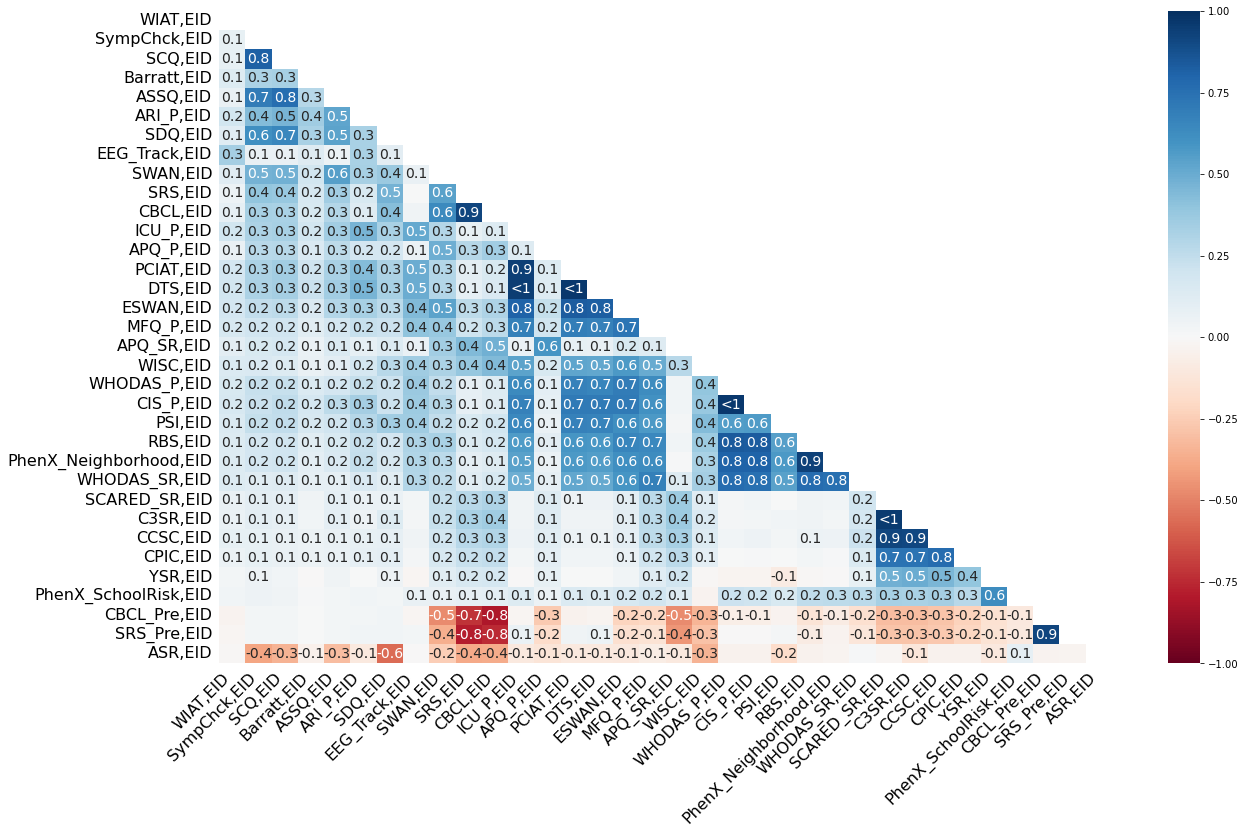

In [21]:
# Check if missingness of assessments is correlated

import missingno as msno
msno.heatmap(full_wo_underscore[relevant_EID_list])

import matplotlib.pyplot as plt
plt.savefig(data_output_dir + 'msno-heatmap.png')

In [22]:
missing_df = full_wo_underscore[relevant_EID_list].iloc[:, [i for i, n in enumerate(np.var(full_wo_underscore[relevant_EID_list].isnull(), axis='rows')) if n > 0]]
corr_mat = missing_df.isnull().corr()

In [23]:
corr_mat_flat = pd.melt(corr_mat.reset_index(), id_vars=['index'], value_vars=[x for x in corr_mat.columns if x!= "index"])
print(len(corr_mat_flat[(corr_mat_flat["value"] != 1) & (abs(corr_mat_flat["value"]) > 0.7)].sort_values(by="index"))/2)
print(len(relevant_EID_list))
corr_mat_flat[(corr_mat_flat["value"] != 1) & (abs(corr_mat_flat["value"]) > 0.7)].sort_values(by="index")

# ==> 
# Strong (>0.7) positive and negative correlations:
#
# ASSQ (parents of all participants): ~ SympChck (parents of all participants), SCQ (parents of all participants)
# C3SRQ (>8yo): ~ >8yo
# CBCL: !~ CBCL_Pre, !~ SRS_Pre, ~SRS
# CBCL_Pre: ~ SRS_Pre, !~ CBCL, !~ SRS
# CCSC (>8yo): ~ >8yo
# CIS_P (parents of all participants): ~WHODAS_SR (all participants), PhenX_Neighborhood (parents of all participants), PCIAT (parents of all participants), RBS (parents of all participants), WHODAS_P (parents of all participants), DTS (parents of all participants), ESWAN (parents of all participants)
# CPIC (>8yo): ~ >8yo
# DTS (parents of all participants): ~ parents of all participants
# ESWAN (parents of all participants): ~ parents of all participants
# ICU_P (parents of all participants): ~ parents of all participants
# MFQ_P (parents of all participants): ~ parents of all participants
# PCIAT (parents of all participants): ~ parents of all participants
# PhenX_Neighborhood (parents of all participants): ~ parents of all participants, WHODAS_SR (all participants)
# RBS (parents of all participants): ~ parents of all participants, WHODAS_SR (all participants)
# SCARED_SR (>8yo): ~ >8yo
# SCQ: ~ ASSQ (parents of all participants), SympChck (parents of all participants)
# SRS: ~ CBCL, !~ CBCL_Pre, SRS_Pre
# SRS_Pre: !~ CBCL, SRS, ~CBCL_Pre
# SympChck (parents of all participants): ~ ASSQ (parents of all participants), SCQ (parents of all participants)
# WHODAS_P (parents of all participants): ~ WHODAS_SR (all participants),  ~ parents of all participants (PhenX_Neighborhood, RBS, CIS_P)
# WHODAS_SR (all participants): ~ parents of all participants (WHODAS_P, PhenX_Neighborhood, RBS, CIS_P)

35.0
35


,index,variable,value
38,"ASSQ,EID","SympChck,EID",0.701047
72,"ASSQ,EID","SCQ,EID",0.765077
978,"C3SR,EID","CPIC,EID",0.738944
876,"C3SR,EID","SCARED_SR,EID",0.960576
944,"C3SR,EID","CCSC,EID",0.908387
1064,"CBCL,EID","CBCL_Pre,EID",-0.811272
1098,"CBCL,EID","SRS_Pre,EID",-0.749963
316,"CBCL,EID","SRS,EID",0.919213
1119,"CBCL_Pre,EID","SRS_Pre,EID",0.920268
337,"CBCL_Pre,EID","SRS,EID",-0.719181


In [69]:
# Check if missing columns are dependent on demographics

age_sex_cols = ["Basic_Demos,Age", "Basic_Demos,Sex"]
data_for_na_report = full_wo_underscore.copy()
data_for_na_report[relevant_EID_list] = data_for_na_report[relevant_EID_list].notnull().astype('int')

data_for_na_report[age_sex_cols] = data_for_na_report[age_sex_cols].astype('float')

corr_matrix = data_for_na_report[relevant_EID_list + age_sex_cols].corr().drop(labels=age_sex_cols)
corr_matrix_styled = corr_matrix[age_sex_cols].style.background_gradient(cmap='coolwarm', vmin=-0.8, vmax=0.8).format(precision=2)

import dataframe_image as dfi
dfi.export(corr_matrix_styled, data_output_dir + 'missingness-demos-corr.png')

corr_matrix[age_sex_cols].to_csv(data_output_dir + 'missingness-demos-corr.csv')

corr_matrix_styled

# ==> Strong (>0.7 only YSR, ages 11-17), no sex corr > abs(0.5)

[0802/131816.219569:INFO:headless_shell.cc(660)] Written to file /var/folders/63/96f7chcx7qq5r9fq4x0x72bw0000gq/T/tmpk52_anif/temp.png.
[0802/131817.853635:INFO:headless_shell.cc(660)] Written to file /var/folders/63/96f7chcx7qq5r9fq4x0x72bw0000gq/T/tmp64akj3h1/temp.png.


,"Basic_Demos,Age","Basic_Demos,Sex"
"Basic_Demos,EID",nan,nan
"WIAT,EID",-0.00,-0.02
"SympChck,EID",-0.20,-0.02
"SCQ,EID",-0.19,-0.02
"Barratt,EID",-0.06,0.02
"ASSQ,EID",-0.16,-0.02
"ARI_P,EID",-0.08,-0.01
"SDQ,EID",-0.29,-0.03
"EEG_Track,EID",-0.03,-0.03
"SWAN,EID",0.02,-0.02


In [70]:
# Check if missing columns are dependent on barratt

barratt_cols = ["Barratt,Barratt_P1_Edu", "Barratt,Barratt_P1_Occ", "Barratt,Barratt_P2_Edu", "Barratt,Barratt_P2_Occ", "Barratt,Barratt_Total", "Barratt,Barratt_Total_Edu", "Barratt,Barratt_Total_Occ"]
data_for_na_report[barratt_cols] = data_for_na_report[barratt_cols].astype('float')
corr_matrix = data_for_na_report[relevant_EID_list + barratt_cols].corr().drop(labels=barratt_cols)
corr_matrix_styled = corr_matrix[barratt_cols].style.background_gradient(cmap='coolwarm', vmin=-0.8, vmax=0.8).format(precision=2)

import dataframe_image as dfi
dfi.export(corr_matrix_styled, data_output_dir + 'missingness-barratt-corr.png')

corr_matrix[barratt_cols].to_csv(data_output_dir + 'missingness-barratt-corr.csv')

corr_matrix_styled

# ==> No strong correlation

[0802/131821.298130:INFO:headless_shell.cc(660)] Written to file /var/folders/63/96f7chcx7qq5r9fq4x0x72bw0000gq/T/tmpt2bf5_64/temp.png.
[0802/131823.196999:INFO:headless_shell.cc(660)] Written to file /var/folders/63/96f7chcx7qq5r9fq4x0x72bw0000gq/T/tmpsbf6nwx4/temp.png.


,"Barratt,Barratt_P1_Edu","Barratt,Barratt_P1_Occ","Barratt,Barratt_P2_Edu","Barratt,Barratt_P2_Occ","Barratt,Barratt_Total","Barratt,Barratt_Total_Edu","Barratt,Barratt_Total_Occ"
"Basic_Demos,EID",nan,nan,nan,nan,nan,nan,nan
"WIAT,EID",0.01,-0.01,0.01,-0.03,0.00,0.03,-0.00
"SympChck,EID",0.07,0.03,0.02,0.03,0.05,0.07,0.04
"SCQ,EID",0.07,0.03,0.02,0.04,0.06,0.08,0.05
"Barratt,EID",nan,nan,nan,nan,nan,nan,nan
"ASSQ,EID",0.08,0.04,0.03,0.03,0.05,0.08,0.04
"ARI_P,EID",0.08,0.03,0.09,0.07,0.10,0.09,0.09
"SDQ,EID",0.06,0.01,-0.01,0.02,0.04,0.06,0.03
"EEG_Track,EID",0.10,-0.01,0.10,0.04,0.07,0.11,0.05
"SWAN,EID",0.05,0.05,0.05,0.01,0.04,0.07,0.03


In [91]:
# Diagnosis counts (any position)
diag_distrib = data_up_to_SCARED[diag_colunms].apply(pd.Series.value_counts).sum(numeric_only=True, axis=1).sort_values(ascending=False)
display(diag_distrib)

diag_distrib.to_csv("data/output/diag_distrib.csv")

ADHD-Inattentive Type                                                          598.0
ADHD-Combined Type                                                             567.0
Specific Learning Disorder with Impairment in Reading                          415.0
Generalized Anxiety Disorder                                                   323.0
Oppositional Defiant Disorder                                                  301.0
Autism Spectrum Disorder                                                       283.0
Specific Phobia                                                                251.0
Language Disorder                                                              244.0
Social Anxiety (Social Phobia)                                                 227.0
Specific Learning Disorder with Impairment in Mathematics                      194.0
Enuresis                                                                       187.0
Specific Learning Disorder with Impairment in Written Expression 